# Mandatory Assignment FIE463 - Numerical Methods in Macroeconomics and Finance using Python

## Task 1
#### Risky return and a positive risk premium

In [26]:
# 1. Compute expected return and risk premium

import numpy as np 
import matplotlib.pyplot as plt  

def expected_risky_return(mu, epsilon):
    probabilities = np.array([0.5, 0.45, 0.05])  # Probabilities for high, low, crash
    returns = np.array([1 + mu + epsilon, 1 + mu - epsilon, 1 + mu - 3 * epsilon])  # Possible returns
    expected_r = np.sum(probabilities * returns)  # Compute expected return as weighted sum
    return expected_r

#Define constants
mu = 0.06 
epsilon = 0.02 
Rf = 1 


E_R = expected_risky_return(mu, epsilon)  # Compute expected risky return
risk_premium = E_R - Rf  # Compute risk premium

print(f"Expected Risky Return: {E_R:.4f}")  # Print expected risky return
print(f"Risk Premium: {risk_premium:.4f}")  # Print risk premium

Expected Risky Return: 1.0580
Risk Premium: 0.0580


## Task 2
#### Utility function

In [28]:
# 2. Define utility function

def util(c, gamma): #Utility function given consumption level and risk aversion parameter gamma
  
    if gamma == 1:
        return np.log(c)
    else:
        return (c**(1 - gamma)) / (1 - gamma)

## Task 3
#### Expected lifetime utility function

In [29]:
# 3 define the expected liftime utility for given parameters

def expected_util(s, alpha, beta, gamma, epsilon, mu, w): # Define expected lifetime utility function
    c1 = w - s  # Compute first-period consumption
    risky_returns = np.array([1 + mu + epsilon, 1 + mu - epsilon, 1 + mu - 3 * epsilon])  # Risky returns
    probabilities = np.array([0.5, 0.45, 0.05])  # Probabilities of return states
    c2 = alpha * risky_returns * s + (1 - alpha) * Rf * s  # Compute second-period consumption
    EU = util(c1, gamma) + beta * np.sum(probabilities * util(c2, gamma))  # Compute expected lifetime utility
    return EU

## Task 4
#### Visualizing expected lifetime utility for selected values

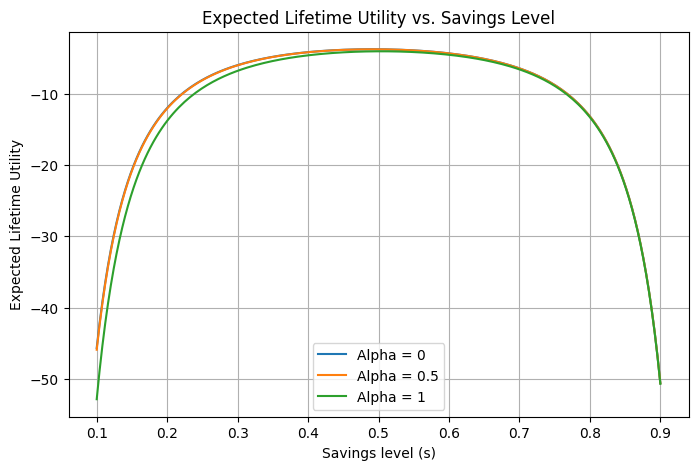

In [30]:
s_grid = np.linspace(0.1, 0.9, 200)  # Create a grid of savings values
alpha_values = [0, 0.5, 1]  # Define different alpha values to test


 # Plot expected utility for different alpha values
plt.figure(figsize=(8, 5))  # Set figure size
for alpha in alpha_values:
    utilities = [expected_util(s, alpha, 0.9, 3, 0.2, 0.06, 1) for s in s_grid]  # Compute expected utility
    plt.plot(s_grid, utilities, label=f'Alpha = {alpha}')  # Plot utility for each alpha


# Makin the plot look nice
plt.xlabel("Savings level (s)")  # Label x-axis
plt.ylabel("Expected Lifetime Utility")  # Label y-axis
plt.legend()  # Add legend
plt.title("Expected Lifetime Utility vs. Savings Level")  # Add title
plt.grid()  # Show grid
plt.show()  # Display plot

##### The inverted U-shape of the expected lifetime utility vs. savings level curve comes from the trade-off between consuming today and saving for future consumption. The concave utility function ensures that both too little and too much saving decrease total expected utility, forming an inverted U-shape.

## Task 5 & Task 6
#### Locating the optimal choices for gien parametes & printing the optimal choices

In [31]:
# 5. Find the optimal savings and investment fraction using grid search

def find_optimum(beta, gamma, epsilon, mu, w):
    s_grid = np.linspace(1e-6, w - 1e-6, 1000)  # Define fine grid for savings
    alpha_grid = np.linspace(0, 1, 1000)  # Define fine grid for alpha
    
    s_mesh, alpha_mesh = np.meshgrid(s_grid, alpha_grid, indexing='ij')  # Create grid mesh
    utility_values = np.vectorize(expected_util)(s_mesh, alpha_mesh, beta, gamma, epsilon, mu, w)  # Compute utilities
    
    max_idx = np.unravel_index(np.argmax(utility_values), utility_values.shape)  # Find maximum utility index
    return s_grid[max_idx[0]], alpha_grid[max_idx[1]], utility_values[max_idx]  # Return optimal values

optimal_s, optimal_alpha, max_utility = find_optimum(0.9, 3, 0.2, 0.06, 1)  # Find optimal parameters
print(f"Optimal Savings: {optimal_s:.4f}, Optimal Alpha: {optimal_alpha:.4f}, Maximized Utility: {max_utility:.4f}")  # Print results

Optimal Savings: 0.4905, Optimal Alpha: 0.2272, Maximized Utility: -3.7793


## Task 7
#### Visulizing the optimal risky share vs gamma 

In [ ]:
# 7. Plot the optimal risky share vs. gamma

gamma_values = np.linspace(1, 10, 101)  # Create range of gamma values
optimal_alpha_gamma = [find_optimum(0.9, gamma, 0.2, 0.06, 1)[1] for gamma in gamma_values]  # Compute optimal alpha for each gamma

plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(gamma_values, optimal_alpha_gamma, label="Optimal Risky Share")  # Plot risky share vs. gamma
plt.xlabel("Risk Aversion (Gamma)")  # Label x-axis
plt.ylabel("Optimal Alpha")  # Label y-axis
plt.title("Optimal Risky Share vs. Risk Aversion")  # Add title
plt.grid()  # Show grid
plt.legend()  # Add legend
plt.show()  # Display plot

## Task 8
#### Visulizing the optimal risky share regarding the epsilon/volatility

In [ ]:
# 8. Plot the optimal risky share vs. epsilon

epsilon_values = np.linspace(0.01, 0.35, 101)  # Create range of epsilon values
optimal_alpha_epsilon = [find_optimum(0.9, 3, epsilon, 0.06, 1)[1] for epsilon in epsilon_values]  # Compute optimal alpha for each epsilon

plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(epsilon_values, optimal_alpha_epsilon, label="Optimal Risky Share")  # Plot risky share vs. epsilon
plt.xlabel("Volatility (Epsilon)")  # Label x-axis
plt.ylabel("Optimal Alpha")  # Label y-axis
plt.title("Optimal Risky Share vs. Volatility")  # Add title
plt.grid()  # Show grid
plt.legend()  # Add legend
plt.show()  # Display plot